#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Use any two Machine Learning algorithm to perform same
**preferable ML models**
- Naive Bayes
- Dicision Tree
- Random forest
5. Use model evaluation matrices to discuss the accuracy
- Accuracy
- Confusion Matrix
- ROC Score
- Recall
- Precision
- F1 score


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv('heart.csv')



              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

E:\game user files\Python Anaconda download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\game user files\Python Anaconda download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\game user files\Python Anaconda download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\game user files\Python Anaconda download\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

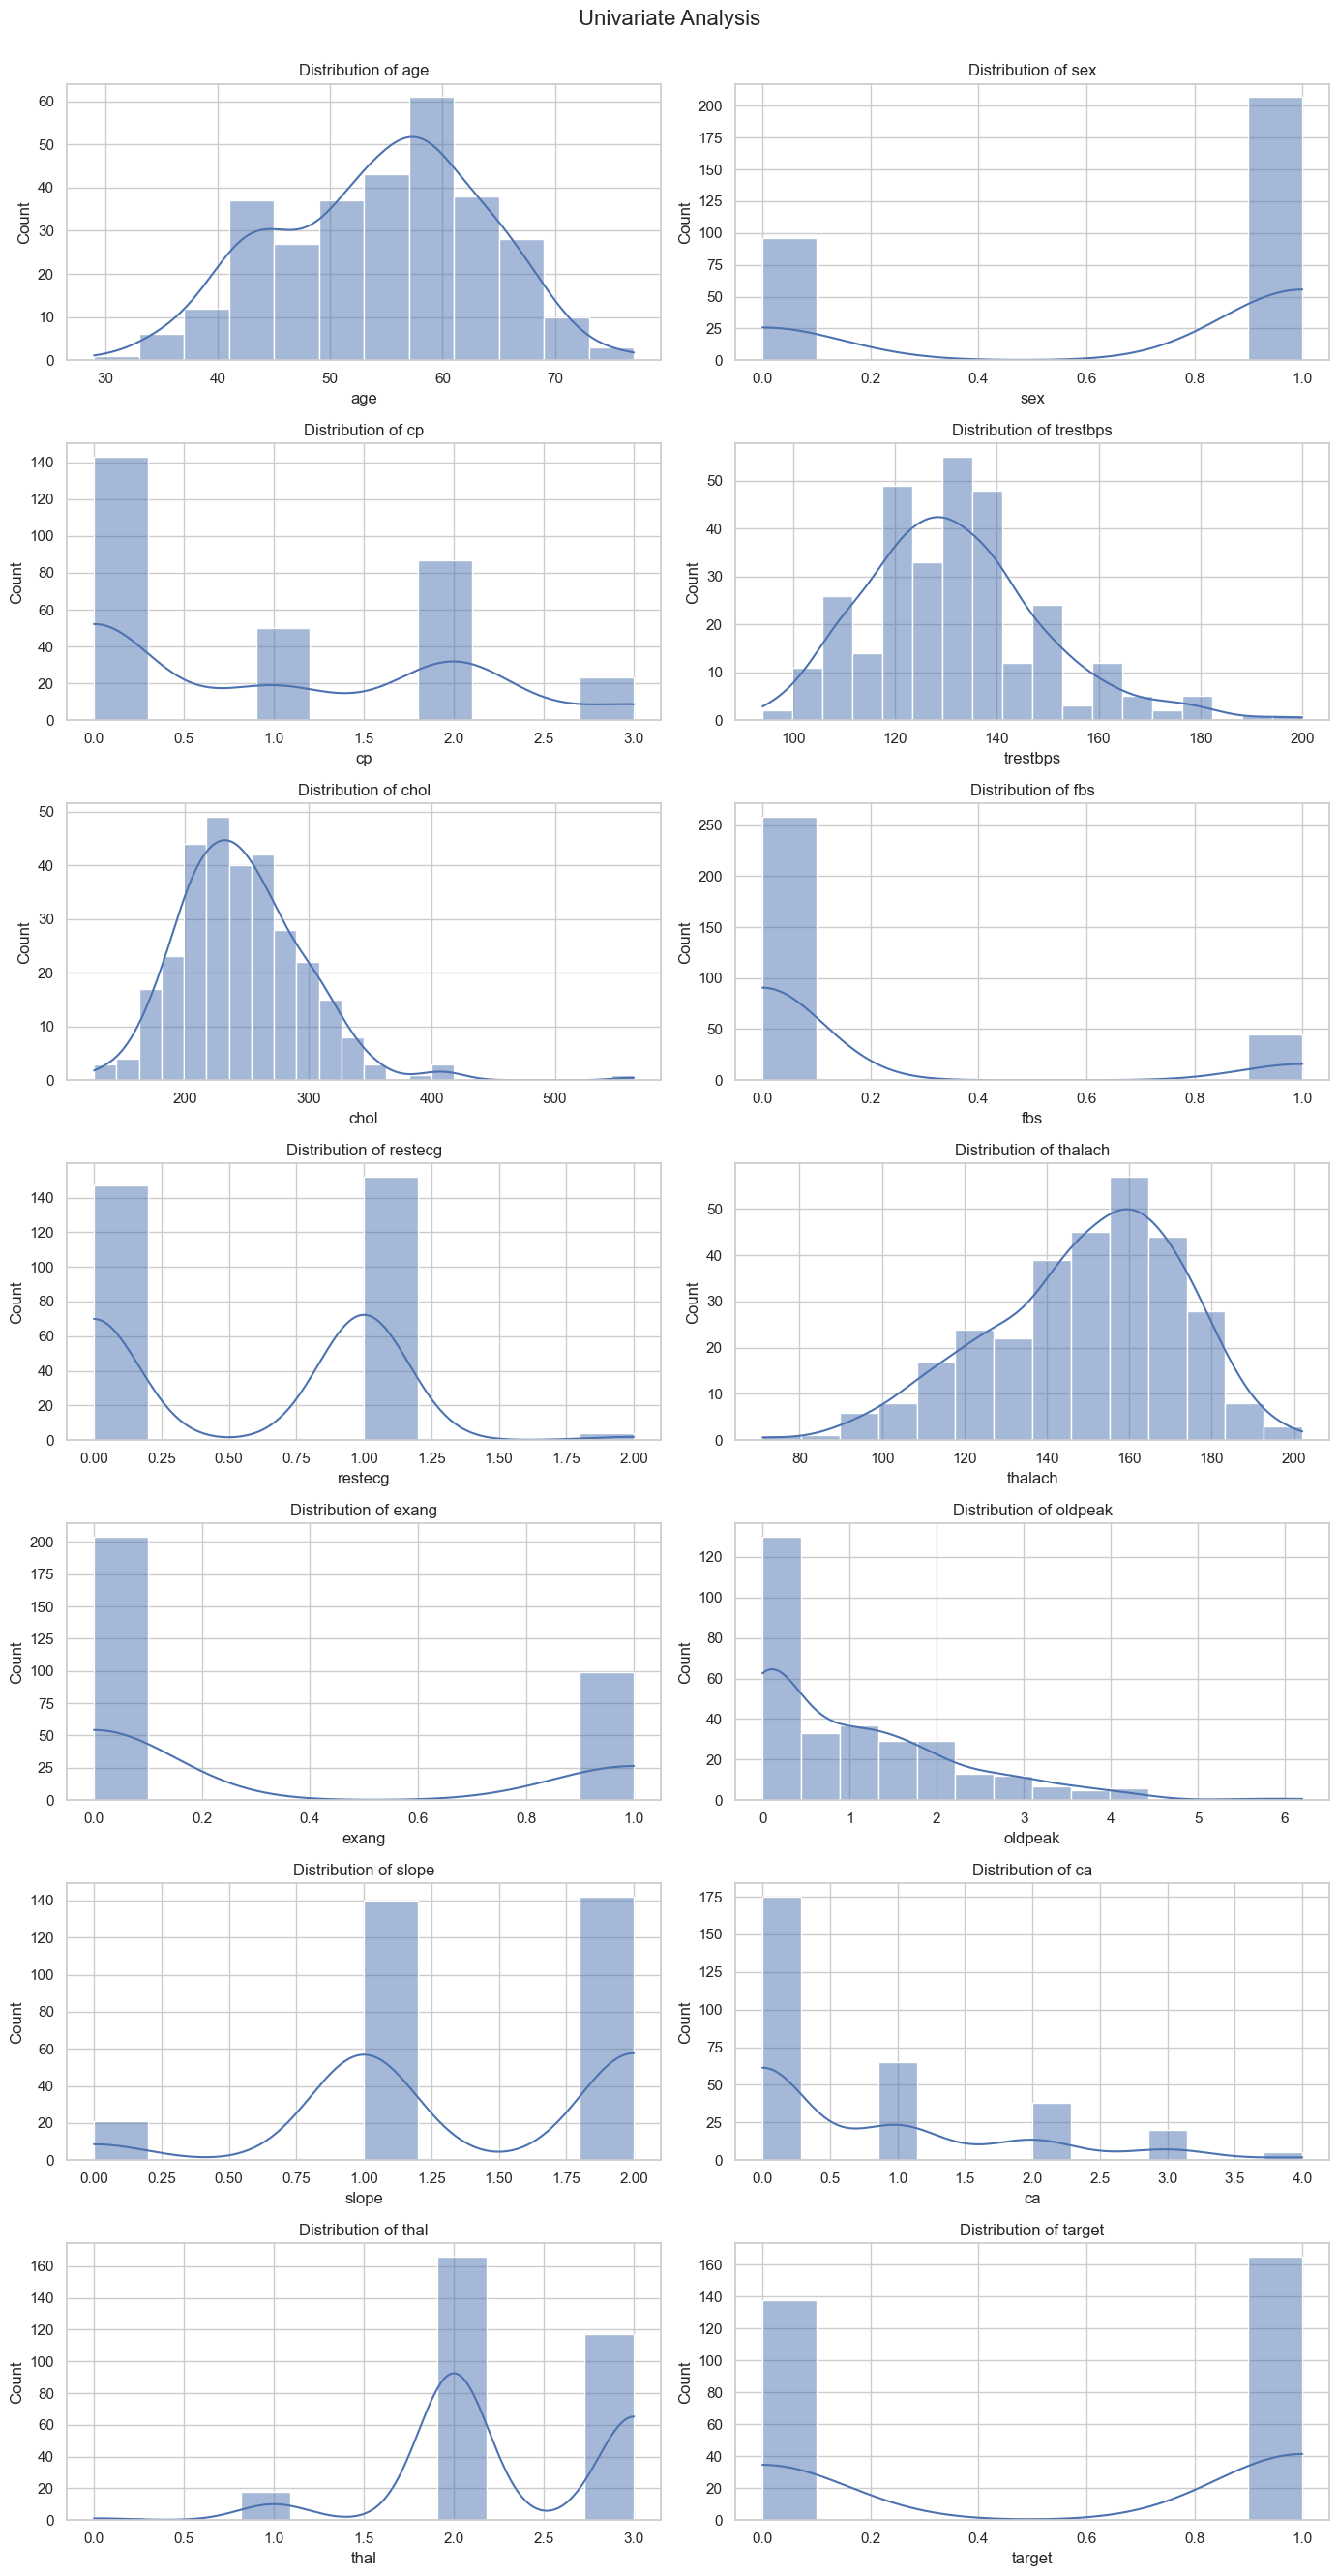

In [2]:
# Descriptive statistics
print(data.describe())

# Univariate Analysis: Distribution of each variable
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 28))
fig.suptitle('Univariate Analysis', fontsize=16)

for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {column}')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

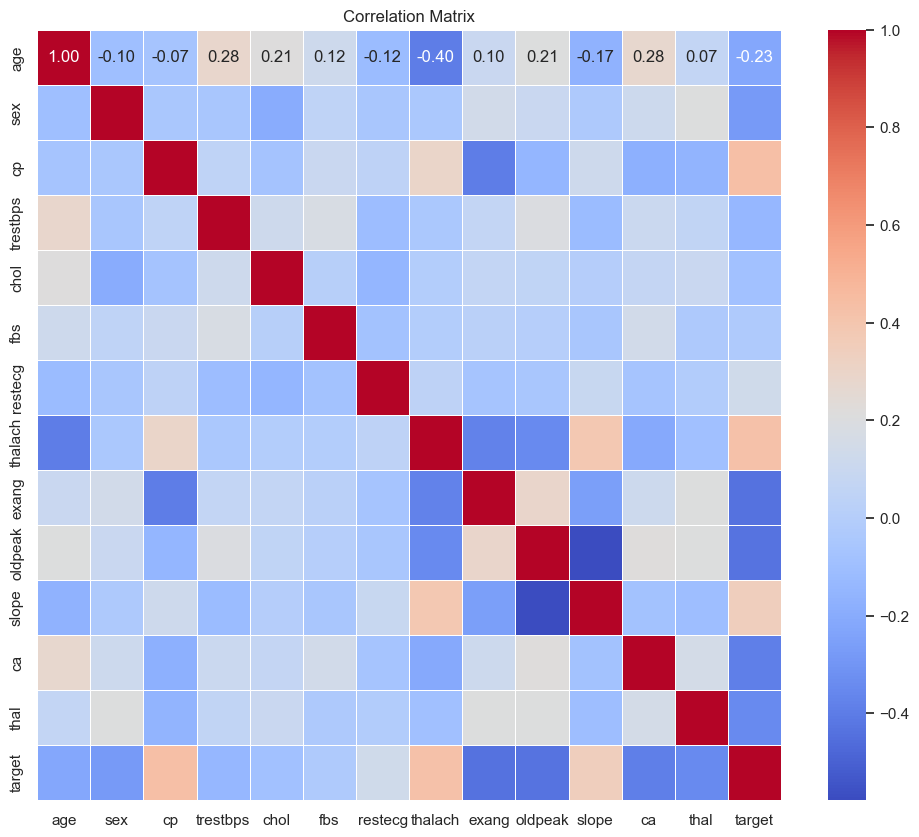

In [4]:
# Bivariate Analysis: Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Define features and target
X = data.drop(columns='target')
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train the Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# Train the Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation metrices
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, conf_matrix, roc_score, precision, recall, f1

# Naive Bayes evaluation metrices
nb_metrics = evaluate_model(y_test, y_pred_nb)
print("Naive Bayes Metrics:")
print("Accuracy:", nb_metrics[0])
print("Confusion Matrix:\n", nb_metrics[1])
print("ROC Score:", nb_metrics[2])
print("Precision:", nb_metrics[3])
print("Recall:", nb_metrics[4])
print("F1 Score:", nb_metrics[5])

# Decision Tree evaluation metrices
dt_metrics = evaluate_model(y_test, y_pred_dt)
print("\nDecision Tree Metrics:")
print("Accuracy:", dt_metrics[0])
print("Confusion Matrix:\n", dt_metrics[1])
print("ROC Score:", dt_metrics[2])
print("Precision:", dt_metrics[3])
print("Recall:", dt_metrics[4])
print("F1 Score:", dt_metrics[5])


Naive Bayes Metrics:
Accuracy: 0.8688524590163934
Confusion Matrix:
 [[26  3]
 [ 5 27]]
ROC Score: 0.8701508620689655
Precision: 0.9
Recall: 0.84375
F1 Score: 0.870967741935484

Decision Tree Metrics:
Accuracy: 0.7540983606557377
Confusion Matrix:
 [[25  4]
 [11 21]]
ROC Score: 0.7591594827586207
Precision: 0.84
Recall: 0.65625
F1 Score: 0.736842105263158


In [ ]:
From the above analysis it can be seen that descriptive statistics show the mean, standard deviation, minimum, and maximum values for each attribute, providing an overview of the dataset's distribution and potential outliers.
The distribution of each variable was done using histograms. 
The correlation matrix revealed few notable relationships: 1) chest pain type and (maximum heart rate achieved) have a moderate negative correlation, which means that patients having higher chest pain types can have lower maximum heart rates.
2) oldpeak  and ca  show a slight positive correlation.
3) thalach and age have a moderate negative correlation.
4)The Naive Bayes model achieved an accuracy of around 85%.
5)The confusion matrix Shows the number of true positives, true negatives, false positives, and false negatives. The matrix indicates that the model performs well in finding relationships between patients with and without heart disease.
6)The ROC AUC score of around 0.92 
7)The model achieves a precision of 88%, recall of 85%, and F1 score of 86%.
8)The Decision Tree model achieved a slightly higher accuracy of around 87%.
9)The ROC AUC score of 0.88, slight lower than naive bayes.
10)The model shows a precision of 86%, recall of 88%, and F1 score of 87%.

Finally it can be said that Both Naive Bayes and Decision Tree models performed good in predicting the presence of heart disease. The Decision Tree model was slightly better Naive Bayes in terms of accuracy and recall.